<a href="https://colab.research.google.com/github/kameshsuryavanshi/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

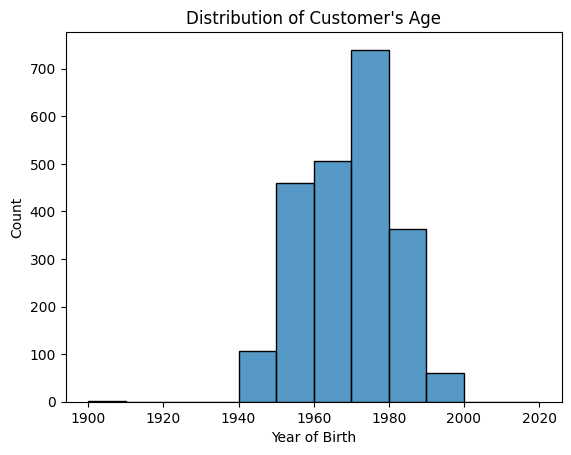

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Read the data
df = pd.read_csv("/content/sample_data/marketing_campaign.csv", sep="\t")

# Calculate TotalAmountSpent
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]

# Plot distribution of Customer's Age
sns.histplot(data=df, x="Year_Birth", bins=list(range(1900, 2022, 10)))
plt.title("Distribution of Customer's Age")
plt.xlabel("Year of Birth")
plt.ylabel("Count")
plt.show()


In [13]:

# Relationship between Income and Total Amount Spent
fig = px.scatter(data_frame=df, x="Income", y="TotalAmountSpent", title="Relationship Between Customer's Income and Total Amount Spent", height=500, color_discrete_sequence=px.colors.qualitative.G10[1:])
fig.show()


In [15]:

# Relationship between Income and Total Amount Spent based on Education
fig = px.scatter(data_frame=df, x="Income", y="TotalAmountSpent", title="Relationship between Income VS Total Amount Spent Based on Education", color="Education", height=500)
fig.show()



In [16]:

# Fill missing values in Income column with median
df["Income"].fillna(df["Income"].median(), inplace=True)

# Standardize the data
data = df[["Income", "TotalAmountSpent"]]
df_log = np.log(data)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

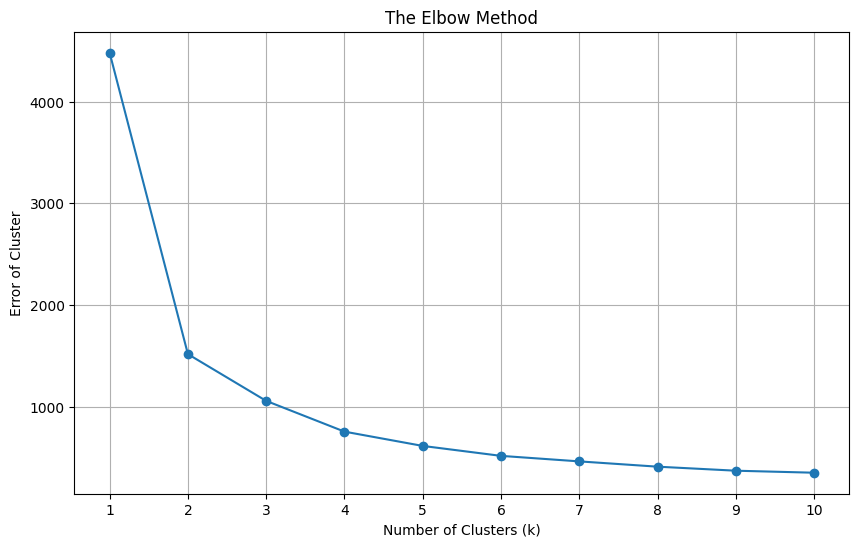

In [21]:
# Determine the optimal number of clusters using the Elbow Method
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init
    model.fit(df_scaled)
    errors.append(model.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), errors, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Error of Cluster')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [23]:
# Fit KMeans model with optimal number of clusters
model = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicitly set n_init
model.fit(df_scaled)

# Assign cluster labels to the data
data = data.assign(ClusterLabel=model.labels_)

# Display the median values of Age, Income, and TotalAmountSpent for each cluster
result = data.groupby("ClusterLabel").agg({"Income":"median", "TotalAmountSpent":"median"}).round()
print(result)


               Income  TotalAmountSpent
ClusterLabel                           
0             25262.0              43.0
1             69084.0            1070.0
2             42641.0             145.0


In [25]:
# Concatenate "Age" column with the existing data
data_with_age = pd.concat([data, df["Year_Birth"]], axis=1)

# Visualize cluster result using 3 features: Income, TotalAmountSpent, and Age
fig = px.scatter_3d(data_frame=data_with_age, x="Income", y="TotalAmountSpent", z="Year_Birth", color="ClusterLabel", height=550, title="Visualizing Cluster Result Using 3 Features")
fig.show()
